In [3]:
from context import speechact
import speechact.classifier.embedding as emb
import speechact.classifier.base as b
import speechact.evaluation as evaluation
import speechact.corpus as corp
import speechact.annotate as anno
import matplotlib.pyplot as plt

In [4]:
labels = anno.SpeechActLabels.get_labels()

# Load upsampled data.
corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-upsampled.conllu.bz2')
test_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-test-upsampled.conllu.bz2')
train_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-train-upsampled.conllu.bz2')

results = {}

In [5]:
def train_model(corpus: corp.Corpus, model_name: str):
    print('Load classifier')
    classifier = emb.EmbeddingClassifier()

    print('Load dataset')
    dataset = emb.CorpusDataset(corpus)
    
    print(f'Train classifier: {model_name}')
    classifier.train(dataset, 32, print_progress=True)
    classifier.save(model_name)

In [6]:
def evaluate_model(corpus: corp.Corpus, model_name: str):
    print('Load classifier')
    classifier = emb.EmbeddingClassifier()
    classifier.load(model_name)

    labels = anno.SpeechActLabels.get_labels()

    print(f'Evaluate classifier: {model_name}')
    return evaluation.evaluate(
        corpus,
        classifier,
        labels,
        draw_conf_matrix=True
    )


# DEV: 20% Training Data (unbalanced training)

Load classifier
Loading model from "../models/neural/dev-model-unb-20.pth"
Evaluate classifier: ../models/neural/dev-model-unb-20.pth
Accuracy: 0.4903581267217631
Classification report:
              precision    recall  f1-score   support

   assertion       0.36      0.89      0.51      1089
    question       0.88      0.52      0.66      1089
   directive       0.91      0.10      0.18      1089
  expressive       0.55      0.45      0.49      1089
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.49      0.49      0.49      4356
   macro avg       0.39      0.28      0.26      4356
weighted avg       0.68      0.49      0.46      4356

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         970        35          2          82           0        0   
question          434       571          

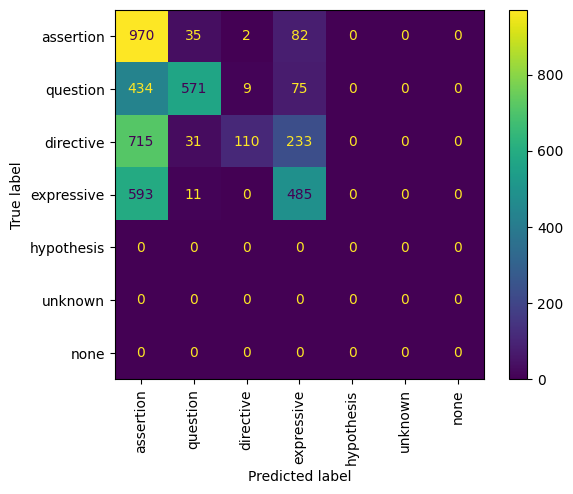

In [12]:
results['dev-model-unb-20'] = evaluate_model(
    train_corpus, model_name='../models/neural/dev-model-unb-20.pth')

# DEV: 20% Training Data (balanced training)

Load classifier
Loading model from "../models/neural/dev-model-bal-20.pth"
Evaluate classifier: ../models/neural/dev-model-bal-20.pth
Accuracy: 0.5617539026629935
Classification report:
              precision    recall  f1-score   support

   assertion       0.42      0.73      0.54      1089
    question       0.83      0.66      0.73      1089
   directive       0.79      0.21      0.34      1089
  expressive       0.53      0.65      0.58      1089
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.56      0.56      0.56      4356
   macro avg       0.37      0.32      0.31      4356
weighted avg       0.64      0.56      0.55      4356

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         791        71         29         198           0        0   
question          261       717         2

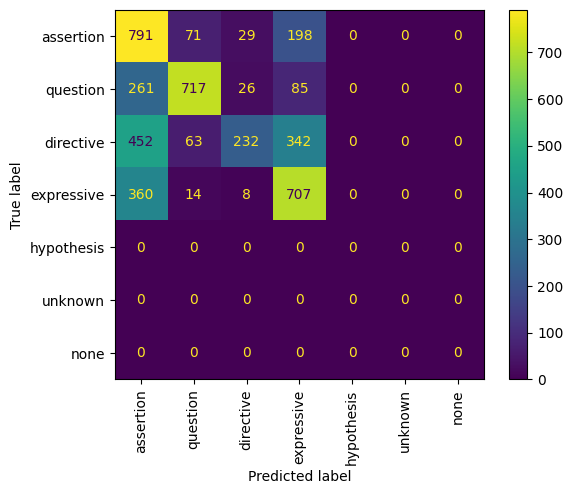

In [13]:
# train_model(test_corpus, model_name='../models/neural/dev-model-bal-20.pth')
results['dev-model-bal-20'] = evaluate_model(
    train_corpus, model_name='../models/neural/dev-model-bal-20.pth')

# DEV: 80% Training Data (balanced)

Load classifier
Loading model from "../models/neural/dev-model-bal-80.pth"
Evaluate classifier: ../models/neural/dev-model-bal-80.pth
Accuracy: 0.7208646616541353
Classification report:
              precision    recall  f1-score   support

   assertion       0.50      0.78      0.61       266
    question       0.87      0.77      0.82       266
   directive       0.88      0.60      0.71       266
  expressive       0.84      0.73      0.78       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.72      0.72      0.72      1064
   macro avg       0.44      0.41      0.42      1064
weighted avg       0.77      0.72      0.73      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         207        11         14          34           0        0   
question           53       206          

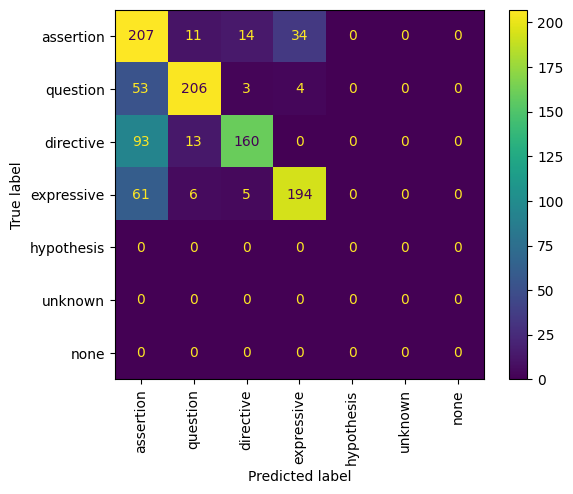

In [14]:
# train_model(train_corpus, model_name='../models/neural/dev-model-bal-80.pth')
results['dev-model-bal-80'] = evaluate_model(
    test_corpus, model_name='../models/neural/dev-model-bal-80.pth')

# DEV: 80% Training Data (class weights)

Load classifier
Loading model from "../models/neural/dev-model-weighted-80.pth"
Evaluate classifier: ../models/neural/dev-model-weighted-80.pth
Accuracy: 0.7236842105263158
Classification report:
              precision    recall  f1-score   support

   assertion       0.53      0.71      0.61       266
    question       0.80      0.80      0.80       266
   directive       0.86      0.70      0.77       266
  expressive       0.80      0.68      0.74       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.72      0.72      0.72      1064
   macro avg       0.43      0.41      0.42      1064
weighted avg       0.75      0.72      0.73      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         190        19         17          40           0        0   
question           50       212

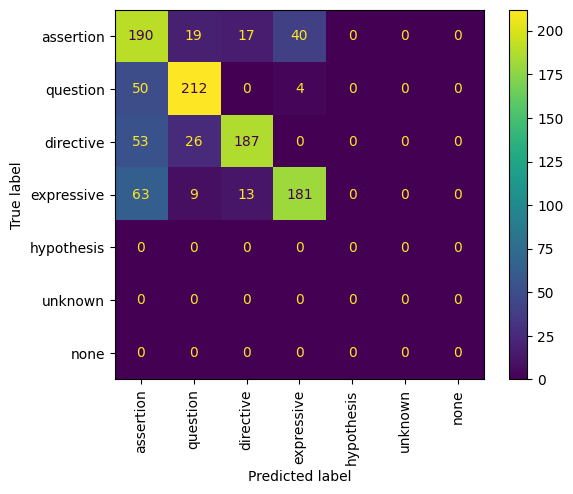

In [8]:
# train_model(train_corpus, model_name='../models/neural/dev-model-weighted-80.pth')
results['dev-model-weighted-80'] = evaluate_model(
    test_corpus, model_name='../models/neural/dev-model-weighted-80.pth')

# FINAL: Test on dev-test data (1 epoch)

Load classifier
Loading model from "../models/neural/final-model-1-epoch.pth"
Evaluate classifier: ../models/neural/final-model-1-epoch.pth
Accuracy: 0.7650375939849624
Classification report:
              precision    recall  f1-score   support

   assertion       0.62      0.71      0.66       266
    question       0.94      0.97      0.96       266
   directive       0.74      0.76      0.75       266
  expressive       0.77      0.63      0.69       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.77      0.77      0.77      1064
   macro avg       0.44      0.44      0.44      1064
weighted avg       0.77      0.77      0.76      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         188         2         28          48           0        0   
question            0       257    

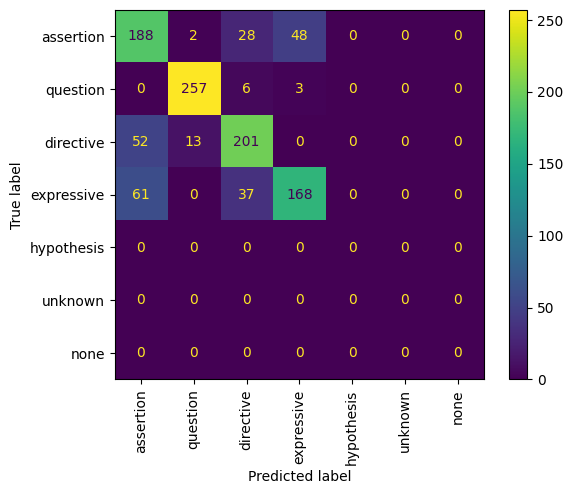

In [13]:
results['final-model-dev-test-1-epoch'] = evaluate_model(
    test_corpus, model_name='../models/neural/final-model-1-epoch.pth')

# FINAL: Test on dev-train data (1 epoch)

Load classifier
Loading model from "../models/neural/final-model-1-epoch.pth"
Evaluate classifier: ../models/neural/final-model-1-epoch.pth
Accuracy: 0.7665289256198347
Classification report:
              precision    recall  f1-score   support

   assertion       0.67      0.70      0.68      1089
    question       0.97      0.93      0.95      1089
   directive       0.73      0.83      0.77      1089
  expressive       0.71      0.61      0.66      1089
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.77      0.77      0.77      4356
   macro avg       0.44      0.44      0.44      4356
weighted avg       0.77      0.77      0.77      4356

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         757         7        146         179           0        0   
question           22      1013    

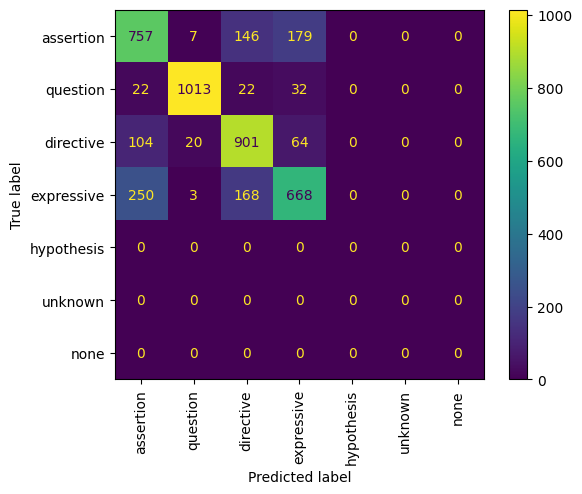

In [17]:
results['final-model-dev-train-1-epoch'] = evaluate_model(
    train_corpus, model_name='../models/neural/final-model-1-epoch.pth')

# FINAL: Test on dev-test data (2 epochs)

Load classifier
Loading model from "../models/neural/final-model-2-epochs.pth"
Evaluate classifier: ../models/neural/final-model-2-epochs.pth
Accuracy: 0.7481203007518797
Classification report:
              precision    recall  f1-score   support

   assertion       0.57      0.67      0.62       266
    question       0.94      0.95      0.95       266
   directive       0.77      0.70      0.73       266
  expressive       0.74      0.66      0.70       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.75      0.75      0.75      1064
   macro avg       0.43      0.43      0.43      1064
weighted avg       0.76      0.75      0.75      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         179         2         28          57           0        0   
question            6       254  

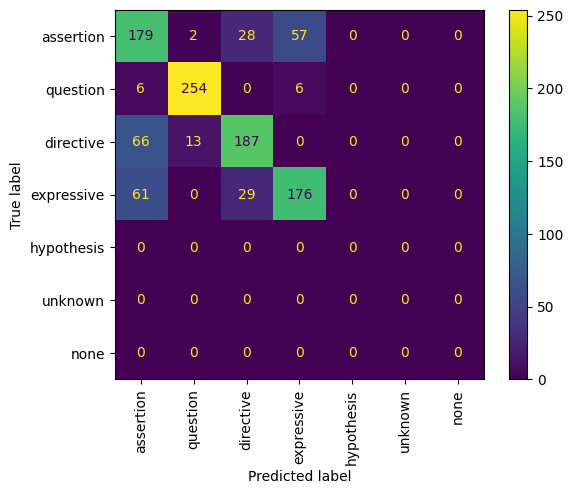

In [15]:
results['final-model-dev-test-2-epochs'] = evaluate_model(
    test_corpus, model_name='../models/neural/final-model-2-epochs.pth')

# FINAL: Test on dev-train data (2 epochs)

Load classifier
Loading model from "../models/neural/final-model-2-epochs.pth"
Evaluate classifier: ../models/neural/final-model-2-epochs.pth
Accuracy: 0.7653810835629018
Classification report:
              precision    recall  f1-score   support

   assertion       0.63      0.68      0.66      1089
    question       0.96      0.96      0.96      1089
   directive       0.76      0.77      0.77      1089
  expressive       0.71      0.65      0.68      1089
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.77      0.77      0.77      4356
   macro avg       0.44      0.44      0.44      4356
weighted avg       0.77      0.77      0.77      4356

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         738        12        124         215           0        0   
question           11      1046  

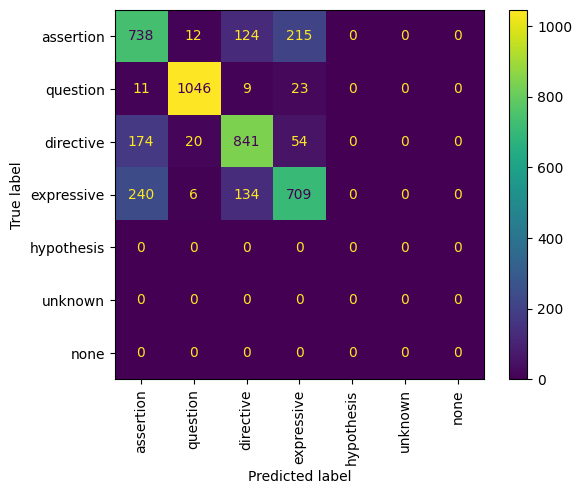

In [19]:
results['final-model-dev-train-3-epochs'] = evaluate_model(
    train_corpus, model_name='../models/neural/final-model-2-epochs.pth')

# FINAL: Test on dev-test data

Load classifier
Loading model from "../models/neural/final-model.pth"
Evaluate classifier: ../models/neural/final-model.pth
Accuracy: 0.7255639097744361
Classification report:
              precision    recall  f1-score   support

   assertion       0.58      0.70      0.63       266
    question       0.95      0.94      0.95       266
   directive       0.73      0.65      0.69       266
  expressive       0.68      0.60      0.64       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.73      0.73      0.73      1064
   macro avg       0.42      0.41      0.42      1064
weighted avg       0.73      0.73      0.73      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         187         0         23          56           0        0   
question            9       251          0         

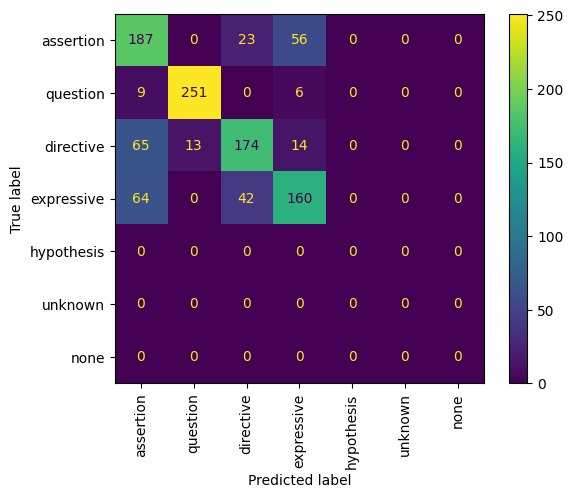

In [11]:
results['final-model-dev-test'] = evaluate_model(
    test_corpus, model_name='../models/neural/final-model.pth')

# FINAL: Test on dev-train data

Load classifier


Loading model from "../models/neural/final-model.pth"
Evaluate classifier: ../models/neural/final-model.pth
Accuracy: 0.7683654729109275
Classification report:
              precision    recall  f1-score   support

   assertion       0.64      0.70      0.67      1089
    question       0.98      0.95      0.97      1089
   directive       0.77      0.78      0.78      1089
  expressive       0.70      0.64      0.67      1089
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.77      0.77      0.77      4356
   macro avg       0.44      0.44      0.44      4356
weighted avg       0.77      0.77      0.77      4356

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         762         7        121         199           0        0   
question           21      1037          0          31           0 

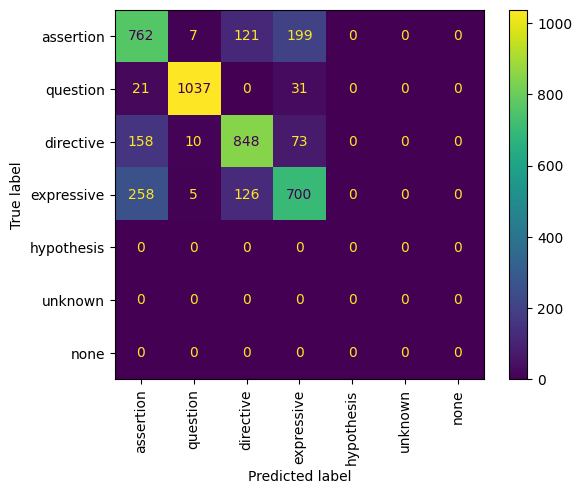

In [12]:
results['final-model-dev-train'] = evaluate_model(
    train_corpus, model_name='../models/neural/final-model.pth')

# Comparison

In [17]:
def plot_bar_graph_01(labels, y_values, title):
    plt.figure(facecolor='white')
    plt.title(title)
    plt.ylim(0, 1)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.grid(True, which='major', axis='y')
    plt.bar(x = labels, height = y_values)
    plt.xticks(rotation=90)
    plt.show()

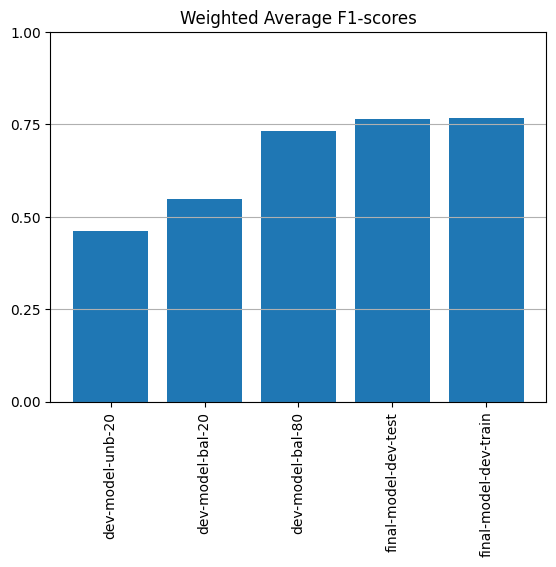

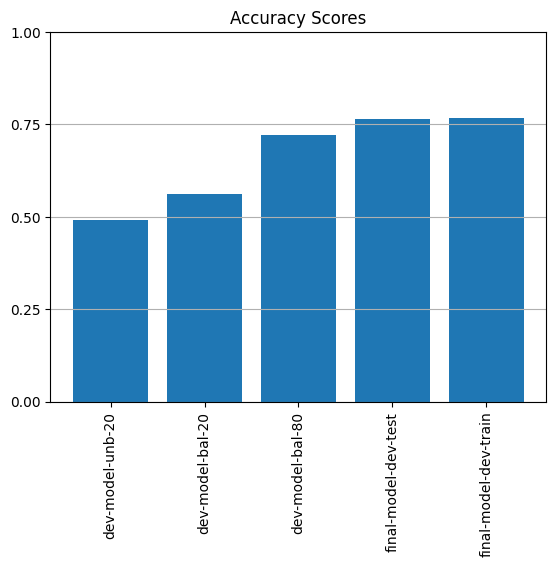

In [18]:
classifiers = list(results.keys())
f1_scores = [results[clsf]['classification_report']['weighted avg']['f1-score'] for clsf in classifiers]
accuracies = [results[clsf]['accuracy'] for clsf in classifiers]

plot_bar_graph_01(classifiers, f1_scores, 'Weighted Average F1-scores')
plot_bar_graph_01(classifiers, accuracies, 'Accuracy Scores')